In [24]:
# citation:
# https://www.kaggle.com/code/calvinwang0312/netflix-dataset-eda-tf-idf-recommendation

In [25]:
!python --version

Python 3.7.13


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
file_path = ".\\rsc\\mysql\\netflix_titles.csv"

netflix_data = pd.read_csv(file_path)

netflix_data.drop('description', axis=1, inplace=True)
netflix_data.drop('director', axis=1, inplace=True)
netflix_data.drop('rating', axis=1, inplace=True)

# transform the type of date_added into datetime
netflix_data.loc[:, 'date_added'] = pd.to_datetime(netflix_data['date_added'])

# transform the type of show_id into int64
netflix_data['show_id'] = pd.factorize(netflix_data['show_id'])[0]

# delete all TV Show records
netflix_data = netflix_data[netflix_data['type'] != 'Movie']

In [28]:
netflix_data.head(3)

,show_id,type,title,cast,country,date_added,release_year,duration,listed_in
1,1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,3,TV Show,Jailbirds New Orleans,NaN,NaN,2021-09-24,2021,1 Season,"Docuseries, Reality TV"


In [29]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 1 to 8803
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       2676 non-null   int64         
 1   type          2676 non-null   object        
 2   title         2676 non-null   object        
 3   cast          2326 non-null   object        
 4   country       2285 non-null   object        
 5   date_added    2666 non-null   datetime64[ns]
 6   release_year  2676 non-null   int64         
 7   duration      2676 non-null   object        
 8   listed_in     2676 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 209.1+ KB


In [30]:
for i in netflix_data.columns:
    null_percent = netflix_data[i].isna().sum()/len(netflix_data) *100
    print("{} null rate: {}%".format(i,round(null_percent,2)))

show_id null rate: 0.0%
type null rate: 0.0%
title null rate: 0.0%
cast null rate: 13.08%
country null rate: 14.61%
date_added null rate: 0.37%
release_year null rate: 0.0%
duration null rate: 0.0%
listed_in null rate: 0.0%


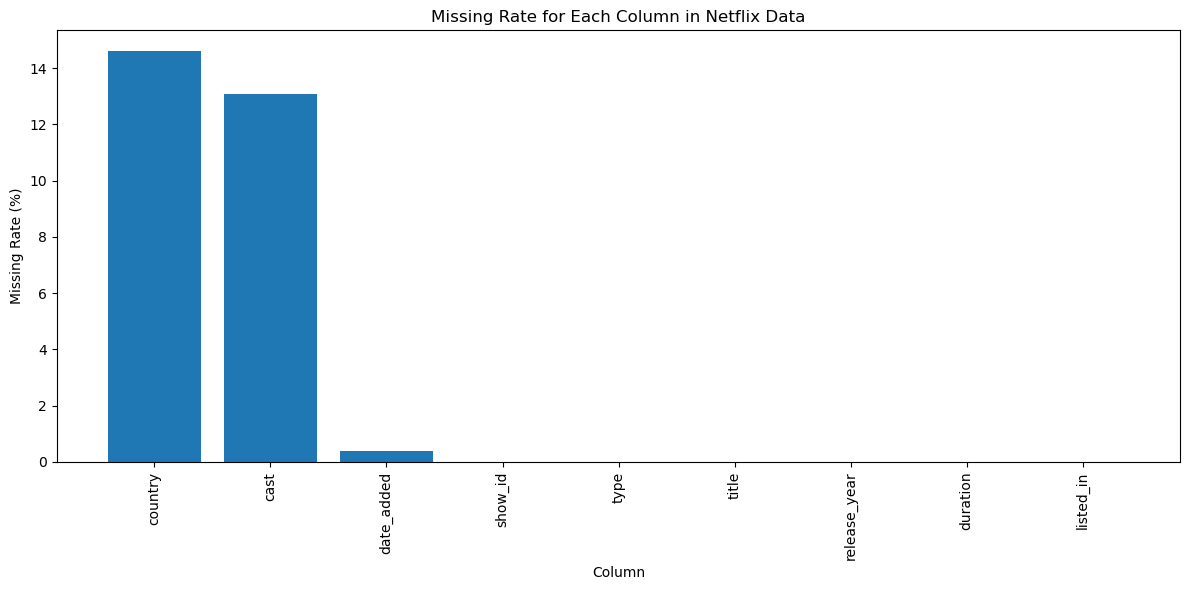

In [31]:
missing_data = pd.DataFrame(columns=['Column', 'MissingRate'])

for i in netflix_data.columns:
    null_percent = netflix_data[i].isna().sum() / len(netflix_data) * 100
    missing_data = missing_data.append({'Column': i, 'MissingRate': null_percent}, ignore_index=True)

missing_data = missing_data.sort_values(by='MissingRate', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(missing_data['Column'], missing_data['MissingRate'])
plt.xlabel('Column')
plt.ylabel('Missing Rate (%)')
plt.title('Missing Rate for Each Column in Netflix Data')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


In [32]:
# Remove rows containing missing data
df = netflix_data.dropna()

In [33]:
# transform the type of duration into int64
df['duration'] = df['duration'].str.extract('(\d+)').astype(int)

D:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
# We can observe that each moive contains several cast and countries
# To simplify the problem, we resolve the cast attribute, and only maintain the first country in country attribute
df_temp = df.copy()
df = (
    df_temp.drop('cast', axis=1)
    .join(
        df_temp['cast'].str.split(', ', expand=True)
        # note that in original dataframe: the country fields can contain more than one country and they are seperated by ', '
        .stack()
        .reset_index(drop=True, level=1)
        .rename('cast')
    )
)

df['country'] = df['country'].str.split(', ').str[0]

In [35]:
# fracture listed_in attribute
df_temp = df.copy()
df = (
    df_temp.drop('listed_in', axis=1)
    .join(
        df_temp['listed_in'].str.split(', ', expand=True)
        # note that in original dataframe: the country fields can contain more than one country and they are seperated by ', '
        .stack()
        .reset_index(drop=True, level=1)
        .rename('listed_in')
    )
)
df = df.drop_duplicates().reset_index(drop=True)

In [36]:
df.head(20)

,show_id,type,title,country,date_added,release_year,duration,cast,listed_in
0,1,TV Show,Blood & Water,South Africa,2021-09-24,2021,2,Ama Qamata,International TV Shows
1,1,TV Show,Blood & Water,South Africa,2021-09-24,2021,2,Ama Qamata,TV Dramas
2,1,TV Show,Blood & Water,South Africa,2021-09-24,2021,2,Ama Qamata,TV Mysteries
3,1,TV Show,Blood & Water,South Africa,2021-09-24,2021,2,Khosi Ngema,International TV Shows
4,1,TV Show,Blood & Water,South Africa,2021-09-24,2021,2,Khosi Ngema,TV Dramas
5,1,TV Show,Blood & Water,South Africa,2021-09-24,2021,2,Khosi Ngema,TV Mysteries
6,1,TV Show,Blood & Water,South Africa,2021-09-24,2021,2,Gail Mabalane,International TV Shows
7,1,TV Show,Blood & Water,South Africa,2021-09-24,2021,2,Gail Mabalane,TV Dramas
8,1,TV Show,Blood & Water,South Africa,2021-09-24,2021,2,Gail Mabalane,TV Mysteries
9,1,TV Show,Blood & Water,South Africa,2021-09-24,2021,2,Thabang Molaba,International TV Shows


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41706 entries, 0 to 41705
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       41706 non-null  int64         
 1   type          41706 non-null  object        
 2   title         41706 non-null  object        
 3   country       41706 non-null  object        
 4   date_added    41706 non-null  datetime64[ns]
 5   release_year  41706 non-null  int64         
 6   duration      41706 non-null  int32         
 7   cast          41706 non-null  object        
 8   listed_in     41706 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(2), object(5)
memory usage: 2.7+ MB


In [38]:
df.to_csv('new_netflix_titles.csv', index=False)

In [39]:
df['show_id'].unique().size

2015